In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import tkinter
from tkinter import *
import math

In [2]:
steam_review = pd.read_csv("Datasets/steam_reviews.csv")

In [3]:
steam_review.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight


In [4]:
steam_review.describe()

,funny,helpful,hour_played
count,4.348910e+05,434891.000000,434891.000000
mean,5.333024e+05,1.004114,364.130773
std,4.785640e+07,59.462935,545.961198
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,62.000000
50%,0.000000e+00,0.000000,190.000000
75%,0.000000e+00,0.000000,450.000000
max,4.294967e+09,28171.000000,31962.000000


In [5]:
steam_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434891 entries, 0 to 434890
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   date_posted             434891 non-null  object
 1   funny                   434891 non-null  int64 
 2   helpful                 434891 non-null  int64 
 3   hour_played             434891 non-null  int64 
 4   is_early_access_review  434891 non-null  bool  
 5   recommendation          434891 non-null  object
 6   review                  433375 non-null  object
 7   title                   434891 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 23.6+ MB


In [6]:
steam_review.isnull().sum()

date_posted                  0
funny                        0
helpful                      0
hour_played                  0
is_early_access_review       0
recommendation               0
review                    1516
title                        0
dtype: int64

In [7]:
steam_review = steam_review.dropna()

In [8]:
steam_review.isnull().sum()

date_posted               0
funny                     0
helpful                   0
hour_played               0
is_early_access_review    0
recommendation            0
review                    0
title                     0
dtype: int64

In [9]:
steam_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433375 entries, 0 to 434890
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   date_posted             433375 non-null  object
 1   funny                   433375 non-null  int64 
 2   helpful                 433375 non-null  int64 
 3   hour_played             433375 non-null  int64 
 4   is_early_access_review  433375 non-null  bool  
 5   recommendation          433375 non-null  object
 6   review                  433375 non-null  object
 7   title                   433375 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 26.9+ MB


In [10]:
steam_review.recommendation.value_counts()

Recommended        302751
Not Recommended    130624
Name: recommendation, dtype: int64

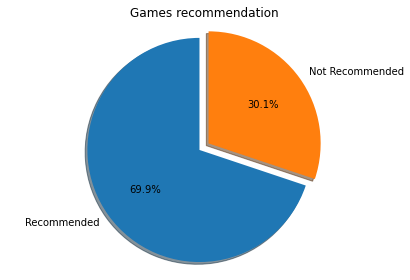

In [11]:
graph_sizes = [steam_review.recommendation.value_counts()[0], steam_review.recommendation.value_counts()[1]]
labels = ["Recommended", "Not Recommended"]

explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.set_title('Games recommendation')
ax1.pie(graph_sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of reviews')

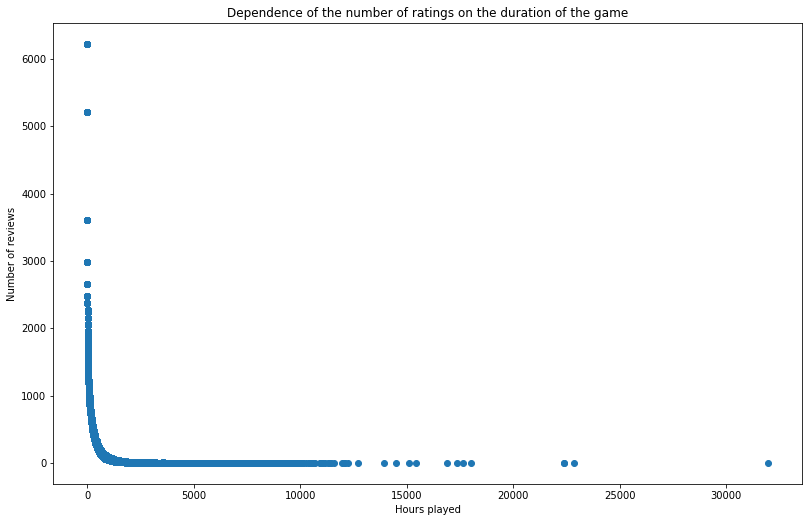

In [12]:
steam_review['hour_played_reviews'] = steam_review.groupby('hour_played')['hour_played'].transform('count')
x = steam_review.hour_played
y = steam_review['hour_played_reviews']
fig = plt.figure(figsize = (13,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x,y)
ax.set_title('Dependence of the number of ratings on the duration of the game')
ax.set_xlabel('Hours played')
ax.set_ylabel('Number of reviews')

In [13]:
top_games = steam_review.title.value_counts()
print("Top 10 games are\n\n",steam_review.title.value_counts()[:10])

Top 10 games are

 PLAYERUNKNOWN'S BATTLEGROUNDS                  144846
Grand Theft Auto V                              99677
Rust                                            70907
Rocket League®                                  67765
Dead by Daylight                                22178
MONSTER HUNTER: WORLD                           18390
ASTRONEER                                        2658
The Elder Scrolls V: Skyrim Special Edition      1471
RESIDENT EVIL 2 / BIOHAZARD RE:2                 1384
Sid Meier’s Civilization® VI                      522
Name: title, dtype: int64


In [14]:
steam_review['review_length'] = steam_review.apply(lambda row: len(str(row['review'])), axis=1)

steam_review['recommendation_int'] = steam_review['recommendation'] == 'Recommended'
steam_review['recommendation_int'] = steam_review['recommendation_int'].astype(int)

<AxesSubplot:xlabel='review', ylabel='title'>

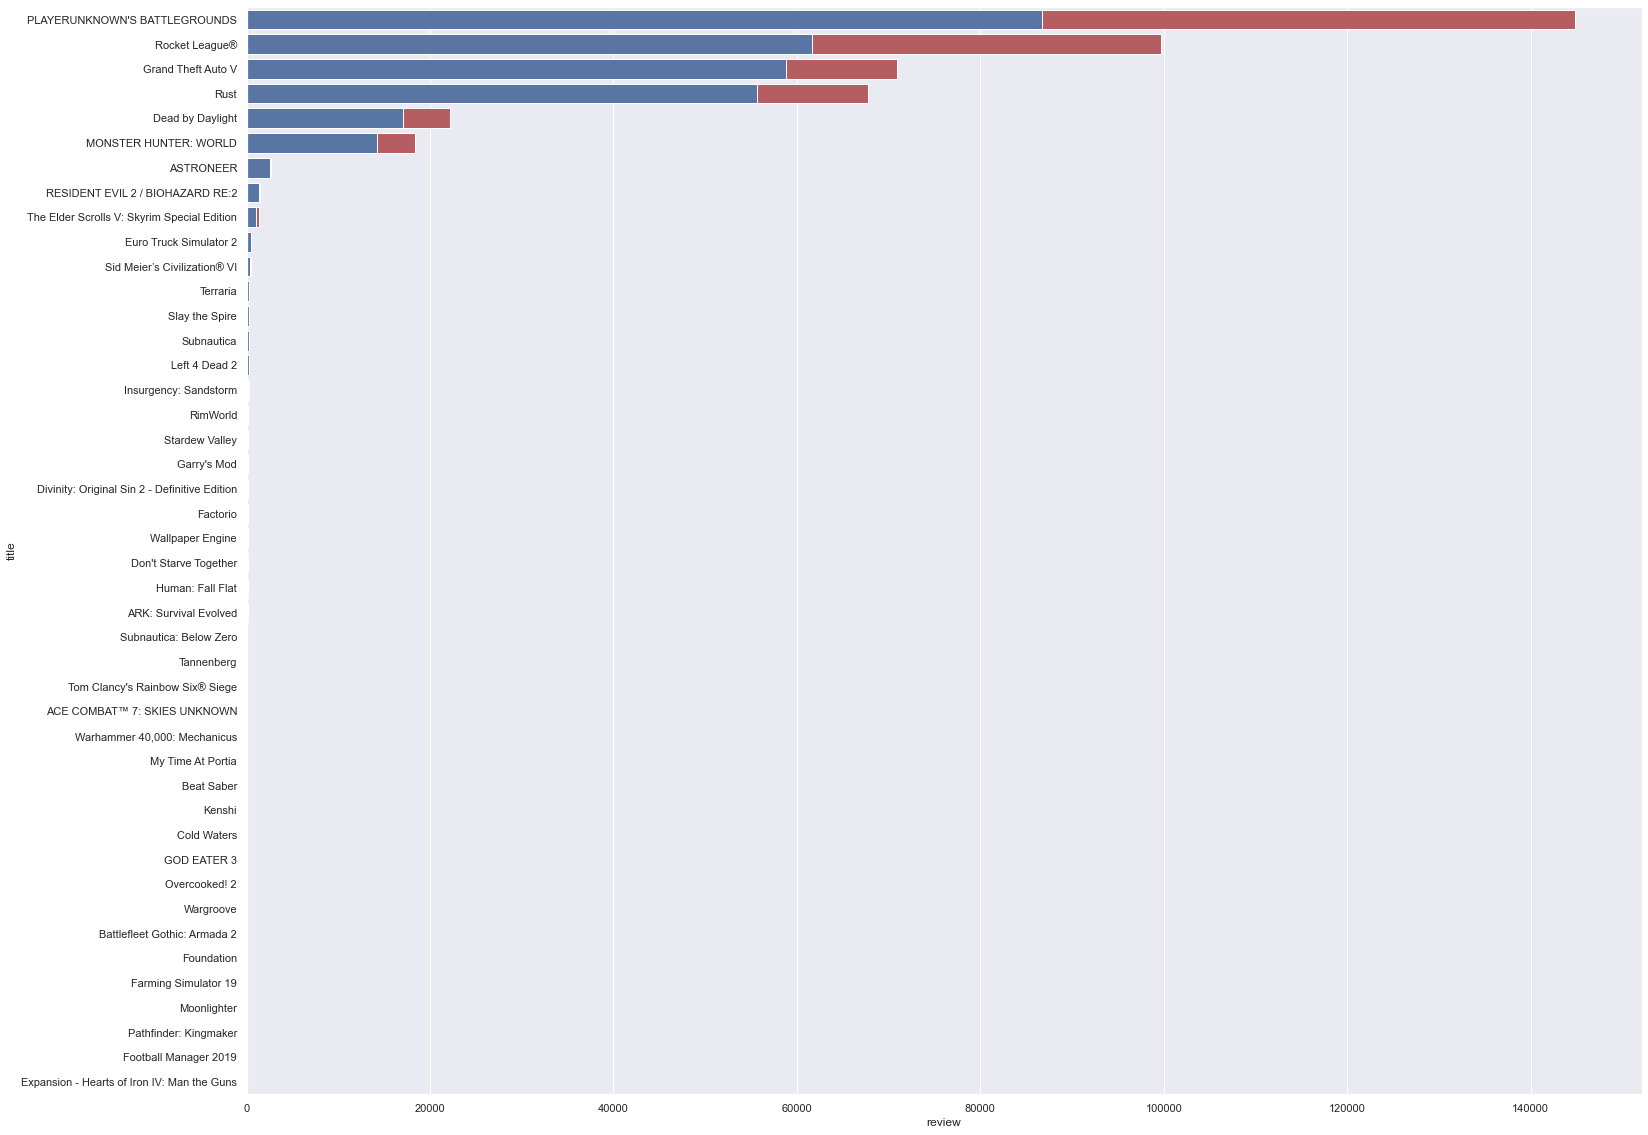

In [15]:
reviews_count = steam_review.groupby(['title'])['review'].count().sort_values(ascending=False)

reviews_count = reviews_count.reset_index()

sns.set(style="darkgrid")
plt.figure(figsize=(25,20))
sns.barplot(y=reviews_count['title'], x=reviews_count['review'], data=reviews_count,
            label="Total", color="r")

reviews_count_pos = steam_review.groupby(['title', 'recommendation_int'])['review'].count().sort_values(ascending=False)
reviews_count_pos = reviews_count_pos.reset_index()
reviews_count_pos = reviews_count_pos[reviews_count_pos['recommendation_int'] == 1]
sns.barplot(y=reviews_count_pos['title'], x=reviews_count_pos['review'], data=reviews_count_pos,
            label="Total", color="b")

In [16]:
steam_review['review_length'] = steam_review.apply(lambda row: len(str(row['review'])), axis=1)

steam_review['recommendation_int'] = steam_review['recommendation'] == 'Recommended'
steam_review['recommendation_int'] = steam_review['recommendation_int'].astype(int)

In [17]:
steam_review

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title,hour_played_reviews,review_length,recommendation_int
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns,171,195,1
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns,662,4,1
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns,85,171,1
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight,148,2094,1
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight,168,1397,1
...,...,...,...,...,...,...,...,...,...,...,...
434886,2018-11-17,1,37,10,False,Recommended,YOUR FLESH WILL ROT AND DECAY.STEEL IS IMMORTA...,"Warhammer 40,000: Mechanicus",2066,1977,1
434887,2018-11-17,3,41,38,False,Recommended,Domini and Dominae I believe what we are deali...,"Warhammer 40,000: Mechanicus",1356,2535,1
434888,2018-11-20,0,0,36,False,Recommended,First off if you like X Com style of games you...,"Warhammer 40,000: Mechanicus",1364,730,1
434889,2018-11-18,1,44,12,False,Recommended,As a disclaimer I'm an AdMech player on the ta...,"Warhammer 40,000: Mechanicus",1923,1789,1


In [18]:
steam_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433375 entries, 0 to 434890
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   date_posted             433375 non-null  object
 1   funny                   433375 non-null  int64 
 2   helpful                 433375 non-null  int64 
 3   hour_played             433375 non-null  int64 
 4   is_early_access_review  433375 non-null  bool  
 5   recommendation          433375 non-null  object
 6   review                  433375 non-null  object
 7   title                   433375 non-null  object
 8   hour_played_reviews     433375 non-null  int64 
 9   review_length           433375 non-null  int64 
 10  recommendation_int      433375 non-null  int32 
dtypes: bool(1), int32(1), int64(5), object(4)
memory usage: 35.1+ MB


In [19]:
steam_review.duplicated().sum()

0

In [20]:
steam_review['review'] = [review.strip().lower() for review in steam_review['review']]

In [21]:
steam_review['review'] = steam_review['review'].replace(r"[^a-zA-Z\d\_\+\-\'\.\/\s]+", ' ', regex = True)

steam_review['review'] = steam_review['review'].replace(["./ ", "' ", " '"], " ", regex = True)

In [22]:
steam_review.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title,hour_played_reviews,review_length,recommendation_int
0,2019-02-10,2,4,578,False,Recommended,gt played as german reich gt declare war on b...,Expansion - Hearts of Iron IV: Man the Guns,171,195,1
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns,662,4,1
2,2019-02-07,0,0,892,False,Recommended,very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns,85,171,1
3,2018-06-14,126,1086,676,False,Recommended,out of all the reviews i wrote this one is pro...,Dead by Daylight,148,2094,1
4,2017-06-20,85,2139,612,False,Recommended,disclaimer i survivor main. i play games for f...,Dead by Daylight,168,1397,1


In [23]:
steam_review.isnull().sum()

date_posted               0
funny                     0
helpful                   0
hour_played               0
is_early_access_review    0
recommendation            0
review                    0
title                     0
hour_played_reviews       0
review_length             0
recommendation_int        0
dtype: int64

In [24]:
data_frame = steam_review

In [25]:
data_frame, test_data = train_test_split(data_frame, test_size=0.20)

In [26]:
train_data, dev_data = train_test_split(data_frame, test_size=0.20)

Text(0.5, 0, 'Rating')

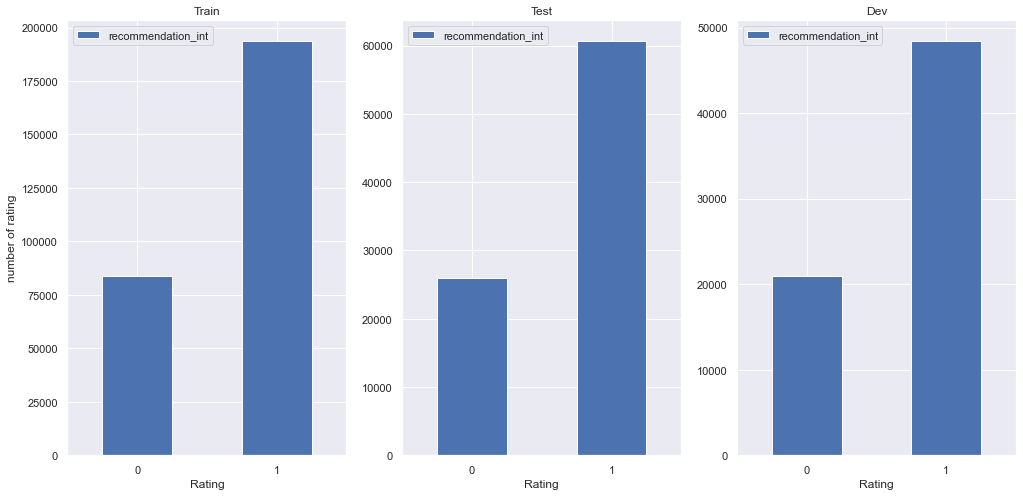

In [27]:
fig, axes = plt.subplots(ncols=3)

plot1 = train_data.recommendation_int.value_counts().sort_index().plot(kind='bar', legend=True, rot=0, ax=axes[0])
plot1.set_title("Train")
plot1.set_xlabel("Rating")
plot1.set_ylabel("number of rating")
plot2 = test_data.recommendation_int.value_counts().sort_index().plot(kind='bar', legend=True, rot=0, ax=axes[1])
plot2.set_title("Test")
plot2.set_xlabel("Rating")
plot3 = dev_data.recommendation_int.value_counts().sort_index().plot(kind='bar', legend=True, rot=0,figsize=(17, 8))
plot3.set_title("Dev")
plot3.set_xlabel("Rating")

In [28]:
tfidf = TfidfVectorizer(max_features=1000)

# transforming traing data to tfidf form arrays. we can use this to train any model
x_train = tfidf.fit_transform(train_data['review']).toarray()
y_train = np.asarray(train_data['recommendation_int'])

In [29]:
x_dev = tfidf.transform(dev_data['review']).toarray()
y_dev = np.asarray(dev_data['recommendation_int'])

In [30]:
print(x_train.shape)
print(y_train.shape)
print(x_dev.shape)
print(y_dev.shape)

(277360, 1000)
(277360,)
(69340, 1000)
(69340,)


In [31]:
mnb = MultinomialNB(alpha=1)
mnb.fit(x_train, y_train)
y_dev_pred_mnb = mnb.predict(x_dev)

# Calculate the Mean Squared Error and Accuracy
mse_mnb = mean_squared_error(y_dev, y_dev_pred_mnb)
accuracy_mnb = accuracy_score(y_dev, y_dev_pred_mnb)*100

# Print the Mean Squared Error and Accuracy
print(f'Mean Squared Error = {mse_mnb}')
print(f'Accuracy = {accuracy_mnb}')

Mean Squared Error = 0.16703201615229304
Accuracy = 83.2967983847707


In [32]:
alpha = [0.01, .1, 0.5, 1, 2]
mnb = {}
mse_mnb = {}
accuracy_mnb = {}
y_dev_pred_mnb = {}
for a in alpha:
    mnb[a] = MultinomialNB(alpha=a)
    mnb[a].fit(x_train, y_train)

    y_dev_pred_mnb[a] = (mnb[a].predict(x_dev))

    mse_mnb[a] = mean_squared_error(y_dev, y_dev_pred_mnb[a])
    accuracy_mnb[a] = accuracy_score(y_dev, y_dev_pred_mnb[a])*100

    print(f'Mean Squared Error = {mse_mnb[a]} for alpha = {a}')
    print(f'Accuracy = {accuracy_mnb[a]} for alpha = {a}')

Mean Squared Error = 0.1669022209402942 for alpha = 0.01
Accuracy = 83.30977790597058 for alpha = 0.01
Mean Squared Error = 0.1669022209402942 for alpha = 0.1
Accuracy = 83.30977790597058 for alpha = 0.1
Mean Squared Error = 0.16703201615229304 for alpha = 0.5
Accuracy = 83.2967983847707 for alpha = 0.5
Mean Squared Error = 0.16703201615229304 for alpha = 1
Accuracy = 83.2967983847707 for alpha = 1
Mean Squared Error = 0.16723391981540237 for alpha = 2
Accuracy = 83.27660801845977 for alpha = 2


In [33]:
mse = {}
accuracy = {}
model = {}
model["MNB"] = mnb
mse["MNB"] = mse_mnb
accuracy["MNB"] = accuracy_mnb

In [34]:
C = [0.01, 0.1, 1, 10, 100]
svm = {}
mse_svm = {}
accuracy_svm = {}
y_dev_pred_svm = {}
for c in C:
    svm[c] = LinearSVC(C=c, dual = False)
    svm[c].fit(x_train, y_train)

    y_dev_pred_svm[c] = (svm[c].predict(x_dev))

    mse_svm[c] = mean_squared_error(y_dev, y_dev_pred_svm[c])
    accuracy_svm[c] = accuracy_score(y_dev, y_dev_pred_svm[c])*100

    print(f'Mean Squared Error = {mse_svm[c]} for C = {c}')
    print(f'Accuracy = {accuracy_svm[c]} for C = {c}')

Mean Squared Error = 0.1444909143351601 for C = 0.01
Accuracy = 85.550908566484 for C = 0.01
Mean Squared Error = 0.1434958177098356 for C = 0.1
Accuracy = 85.65041822901645 for C = 0.1
Mean Squared Error = 0.14330833573694837 for C = 1
Accuracy = 85.66916642630517 for C = 1
Mean Squared Error = 0.14322180559561581 for C = 10
Accuracy = 85.67781944043841 for C = 10
Mean Squared Error = 0.14322180559561581 for C = 100
Accuracy = 85.67781944043841 for C = 100


In [35]:
model['SVM'] = svm
mse['SVM'] = mse_svm
accuracy['SVM'] = accuracy_svm

In [36]:
def ensemble(x):
    x_array = tfidf.transform(x).toarray()
    y_pred_dict = {}
    for a in alpha:
        y_pred = model['MNB'][a].predict(x_array)[0]
        if y_pred in y_pred_dict:
            y_pred_dict[y_pred] += (accuracy['MNB'][a])
        else:
            y_pred_dict[y_pred] = (accuracy['MNB'][a])

    for c in C:
        y_pred = model['SVM'][c].predict(x_array)[0]
        if y_pred in y_pred_dict:
            y_pred_dict[y_pred] += (accuracy['SVM'][c])
        else:
            y_pred_dict[y_pred] = (accuracy['SVM'][c])

    inverse = [(value, key) for key, value in y_pred_dict.items()]
    return max(inverse)[1]

In [37]:
y_dev_pred_ens = []

for index, row in dev_data.iterrows():
    y_dev_pred_ens.append(ensemble([row['review']]))


mse_ens = mean_squared_error(y_dev, y_dev_pred_ens)
accuracy_ens = accuracy_score(y_dev, y_dev_pred_ens)*100

print(f'Mean Squared Error = {mse_ens}')
print(f'Accuracy = {accuracy_ens}')

Mean Squared Error = 0.14459186616671474
Accuracy = 85.54081338332853


In [38]:
estimators = [1, 10, 50]
rfc = {}
mse_rfc = {}
accuracy_rfc = {}
y_dev_pred_rfc = {}
for n in estimators:
    rfc[n] = RandomForestClassifier(max_depth=25, n_estimators=n)
    rfc[n].fit(x_train, y_train)

    y_dev_pred_rfc[n] = (rfc[n].predict(x_dev))

    mse_rfc[n] = mean_squared_error(y_dev, y_dev_pred_rfc[n])
    accuracy_rfc[n] = accuracy_score(y_dev, y_dev_pred_rfc[n])*100

    print(f'Mean Squared Error = {mse_rfc[n]} for n = {n}')
    print(f'Accuracy = {accuracy_rfc[n]} for n = {n}')

Mean Squared Error = 0.240798961638304 for n = 1
Accuracy = 75.92010383616959 for n = 1
Mean Squared Error = 0.20465820594173637 for n = 10
Accuracy = 79.53417940582636 for n = 10
Mean Squared Error = 0.19548601096048457 for n = 50
Accuracy = 80.45139890395154 for n = 50


In [39]:
smpl_model = []
smpl_accuracy = []
smpl_mse = []
for i in range(5):
    smpl_df = steam_review.sample(20000)
    smpl_tfidf = TfidfVectorizer(max_features=200)

    smpl_train_df, smpl_dev_df = train_test_split(smpl_df, test_size=0.20)

    x_smpl_train = smpl_tfidf.fit_transform(smpl_train_df['review']).toarray()
    y_smpl_train = np.asarray(smpl_train_df['recommendation_int'])

    x_smpl_dev = smpl_tfidf.transform(smpl_dev_df['review']).toarray()
    y_smpl_dev = np.asarray(smpl_dev_df['recommendation_int'])

    smpl_mnb = MultinomialNB(alpha=.1)
    smpl_mnb.fit(x_smpl_train, y_smpl_train)
    y_dev_pred_smpl_mnb = smpl_mnb.predict(x_smpl_dev)

    mse_smpl_mnb = mean_squared_error(y_smpl_dev, y_dev_pred_smpl_mnb)
    accuracy_smpl_mnb = accuracy_score(y_smpl_dev, y_dev_pred_smpl_mnb)*100

    print(f'Mean Squared Error of MNB = {mse_smpl_mnb}')
    print(f'Accuracy of MNB = {accuracy_smpl_mnb}')

    smpl_svm = LinearSVC(C=1, dual = False)
    smpl_svm.fit(x_smpl_train, y_smpl_train)

    y_dev_pred_smpl_svm = (smpl_svm.predict(x_smpl_dev))

    mse_smpl_svm = mean_squared_error(y_smpl_dev, y_dev_pred_smpl_svm)
    accuracy_smpl_svm = accuracy_score(y_smpl_dev, y_dev_pred_smpl_svm)*100

    print(f'Mean Squared Error of SVM = {mse_smpl_svm}')
    print(f'Accuracy of SVM = {accuracy_smpl_svm}')

    smpl_model.append(smpl_mnb)
    smpl_model.append(smpl_svm)
    smpl_accuracy.append(accuracy_smpl_mnb)
    smpl_accuracy.append(accuracy_smpl_svm)
    smpl_mse.append(mse_smpl_mnb)
    smpl_mse.append(mse_smpl_svm)

Mean Squared Error of MNB = 0.22475
Accuracy of MNB = 77.525
Mean Squared Error of SVM = 0.19475
Accuracy of SVM = 80.525
Mean Squared Error of MNB = 0.23825
Accuracy of MNB = 76.175
Mean Squared Error of SVM = 0.21025
Accuracy of SVM = 78.975
Mean Squared Error of MNB = 0.23
Accuracy of MNB = 77.0
Mean Squared Error of SVM = 0.1995
Accuracy of SVM = 80.05
Mean Squared Error of MNB = 0.226
Accuracy of MNB = 77.4
Mean Squared Error of SVM = 0.20375
Accuracy of SVM = 79.625
Mean Squared Error of MNB = 0.23125
Accuracy of MNB = 76.875
Mean Squared Error of SVM = 0.204
Accuracy of SVM = 79.60000000000001


In [40]:
def ensemble2(x):
    x_smpl_array = smpl_tfidf.transform(x).toarray()
    y_smpl_pred_dict = {}
    for i in range(10):
        y_pred = smpl_model[i].predict(x_smpl_array)[0]
        if y_pred in y_smpl_pred_dict:
            y_smpl_pred_dict[y_pred] += (smpl_accuracy[i])
        else:
            y_smpl_pred_dict[y_pred] = (smpl_accuracy[i])

    inverse = [(value, key) for key, value in y_smpl_pred_dict.items()]
    return max(inverse)[1]

In [41]:
y_dev_pred_ens2 = []
for index, row in dev_data.iterrows():
    y_dev_pred_ens2.append(ensemble2([row['review']]))

y_dev = np.asarray(dev_data['recommendation_int'])

mse_ens = mean_squared_error(y_dev, y_dev_pred_ens2)
accuracy_ens = accuracy_score(y_dev, y_dev_pred_ens2)*100

print(f'Mean Squared Error = {mse_ens}')
print(f'Accuracy = {accuracy_ens}')

Mean Squared Error = 0.2600230747043554
Accuracy = 73.99769252956446


In [42]:
x_test = tfidf.transform(test_data['review']).toarray()
y_test = np.asarray(test_data['recommendation_int'])

In [43]:
c=1
y_test_pred = (svm[c].predict(x_test))

mse_test = mean_squared_error(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)*100

print(f'Mean Squared Error test = {mse_test}')
print(f'Accuracy test = {accuracy_test}')

Mean Squared Error test = 0.1436515719642342
Accuracy test = 85.63484280357659


In [78]:
def rating():
    x = textfield_label.get()
    results.delete("all")
    value = ensemble([x])
    print(value)
    if value == 1:
        text = "positive"
    else:
        text = "Negative"
    results.create_text(200, 80, text="The comment is "+text, font='Arial 20', fill='white')
    return value

window = Tk()
window.geometry("500x500")
window.title("Game Recommender")
window.config(bg="black")
head = Label(window, text="Game Review Classifier", bg="black", foreground="white", font=("Arial", 25)).pack()
Label(window, text="Comment", bg="black", foreground="white", font=("Arial", 10)).place(x=100, y=80)
Label(window, text="______________________________", bg="black", foreground="white").place(x=173, y=90)
textfield_label = Entry(window, bg="black", foreground="white", border=0, insertbackground="white")
textfield_label.focus()
textfield_label.place(x=175, y=80, height=20, width=150)
output = Label(window, bg="black", foreground="white", font=("Arial", 25)).place(x=50, y=250)
search = Button(window, text="Rate", command=rating).place(x=200, y=150, width=100)
print(search)
results = tkinter.Canvas(bg='black', width='400', height='200', highlightthickness=0)
results.place(x=50, y=250)
window.mainloop()

None
1
0
